In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
rng = np.random.default_rng()
m = rng.standard_normal(500) #random values for pixelized map, m_p

In [45]:
P = np.vstack([np.eye(len(m)), np.flip(np.eye(len(m)), axis=1)])
P_onepass = np.copy(P)

n_pass=1
for i in range(n_pass):
    P = np.vstack([P, P_onepass]) #pointing matrix that traverses the map n_pass times

In [46]:
n = rng.standard_normal(P.shape[0]) #white noise

In [47]:
x = np.linspace(0, 4*np.pi, P.shape[0])
n_corr = np.sin(2*x) * 0

In [48]:
d = P@m + n + n_corr

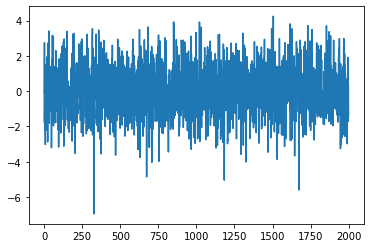

In [49]:
plt.plot(d)

In [50]:
C_n = np.eye(P.shape[0]) #good approximation

In [ ]:
C_t = np.zeros_like(C_n)
for i in range(2000):
    n = rng.standard_normal(P.shape[0])
    C_t += np.outer(n + n_corr, n + n_corr)
C_t /= 2000

In [ ]:
C_t

In [ ]:
C_t.shape

In [23]:
#MLE solution (white noise only)
m_bin = np.linalg.inv(P.T @ C_n @ P) @ P.T @ C_n @ d

In [24]:
m_MLE = np.linalg.inv(P.T @ np.linalg.inv(C_t) @ P) @ P.T @ np.linalg.inv(C_t) @ d

In [25]:
np.mean(m - m_MLE), np.mean(m- m_bin)

(1.27546838045434, -0.0034868385012147844)

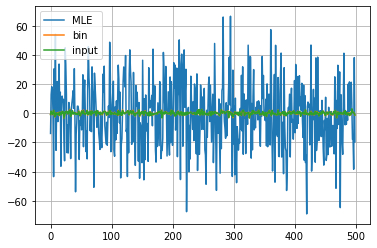

In [26]:
plt.plot(m_MLE, label='MLE')
plt.plot(m_bin, label='bin')
plt.plot(m, label='input')
plt.grid()
plt.legend()

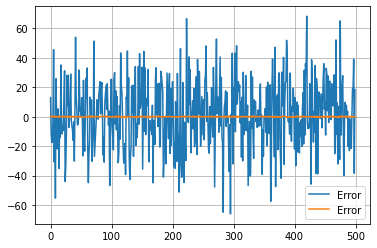

In [27]:
plt.plot(m - m_MLE, label='Error')
plt.plot(m - m_bin, label='Error')

plt.grid()
plt.legend()